In [17]:
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt

# 1. 데이터 load하기

- wav file load
    - fs : 신호 길이, 데이터들 보아하니 신호길이는 16000(1초?)로 동일한걸로 보임
    - data : 데이터 정보

In [18]:
from scipy.io import wavfile
file_num = '00002'
fs, signal = wavfile.read('./train/train_{}.wav'.format(file_num))

In [19]:
fs

16000

## 1.1 time domain 데이터

In [20]:
signal.shape

(16000,)

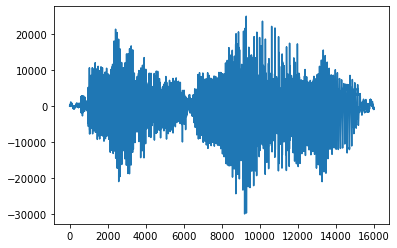

In [21]:
plt.plot(signal)
plt.show()

## 1.2 frequency domain data

- 1) STFT
- 2) melspectrogram : 사람 귀에 맞게 비율재조정(?)

- 음성데이터 stft 돌려서 상황을보자
    - ?이거 막상할라니까 STFT를 잘모름 : 시계열을 일정한 시간 구간으로 나누고 각 구간에 대해 FFT를 통해서 주파수 스펙트럼을 만들어내는 방법정도?
    - 최소 nfft, hop_length 정도는 알아야지

In [22]:
import librosa

In [23]:
signal

array([  -5,   64,  -99, ..., -884, -856, -759], dtype=int16)

- STFT 결과

In [40]:
nfft=640
hop_length = int(fs/nfft)
stft_result = librosa.stft(np.float32(signal), n_fft=nfft, hop_length=hop_length)
print(stft_result.shape)
stft_result_db = librosa.amplitude_to_db(np.abs(stft_result))

(321, 641)


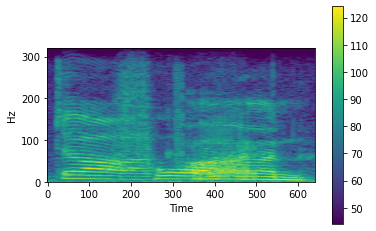

In [41]:
plt.imshow(stft_result_db)
plt.colorbar()
plt.ylabel('Hz')
plt.ylim(0, nfft/2)
plt.xlabel('Time')
plt.show()

- 멜 스펙트로그램은 주파수의 단위를 멜 단위(mel unit)로 바꾼 스펙트로그램
    - 멜단위는 사람이 귀로 들었을때 주로 들리는 부분을 강조하는 새로운 단위? 정도로 이해하면될듯함
    - 위랑 아래 비교해보면 아래쪽 주파수영역이 좀더 강조된 결과처럼 보이는걸 알 수 있다.
    


In [42]:
hop_length = int(fs/nfft)
n_mles = nfft/2
mel_result = librosa.feature.melspectrogram(y=np.float32(signal), sr=fs, n_mels=n_mles, hop_length=hop_length)
mel_result_db = librosa.power_to_db(mel_result)
print (mel_result_db.shape)

(320, 641)


- melspectrogram 결과

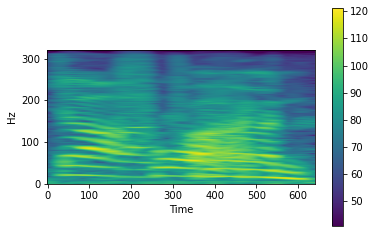

In [43]:
plt.imshow(mel_result_db)
plt.colorbar()
plt.ylabel('Hz')
plt.ylim(0, nfft/2)
plt.xlabel('Time')
plt.show()

- label data(csv file) load
    - 와.. 데이터 10만개
    - 일단 이렇게하고 전체 행렬을 끄집어내야할듯

## 1.3 label

In [12]:
import pandas as pd

In [13]:
label_df = pd.read_csv('./train_answer.csv')
label_df

,id,bed,bird,cat,dog,down,eight,five,four,go,...,sheila,six,stop,three,tree,two,up,wow,yes,zero
0,0,0.00,0.0,0.00,0.00,0.0,0.00,0.25,0.00,0.00,...,0.0,0.0,0.25,0.0,0.0,0.00,0.0,0.0,0.00,0.0
1,1,0.00,0.0,0.25,0.00,0.0,0.00,0.25,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
2,2,0.00,0.0,0.00,0.25,0.0,0.00,0.25,0.25,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
3,3,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.25,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
4,4,0.00,0.0,0.00,0.00,0.0,0.25,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0.00,0.0,0.00,0.00,0.0,0.25,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.25,0.0,0.0,0.00,0.0
99996,99996,0.25,0.0,0.00,0.00,0.0,0.00,0.00,0.25,0.25,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0
99997,99997,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.25,...,0.0,0.0,0.00,0.5,0.0,0.00,0.0,0.0,0.00,0.0
99998,99998,0.25,0.0,0.00,0.00,0.0,0.25,0.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [14]:
label_array = label_df.values
label_array.shape

(100000, 31)

# 2. data loader for pytorch

- X : 이미지화 된 melspectrogram 사용하자
- Y : 라벨

In [15]:
from torch.utils.data import Dataset, DataLoader
import torch
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import librosa

from scipy.io import wavfile
import glob
import tqdm


- label load

In [68]:
label_df = pd.read_csv('./train_answer.csv')
label = []
for label_name in label_df.columns[1:]:
    label.append(np.int32(label_df[label_name].values!=0)) # label bed 인 부분만 꺼내서 0이 아니면 1로지정
label = np.array(label)

- X load

In [17]:

dir_list = glob.glob('./train/*.wav') # 신호데이터가 너무 클테니까 directory list로 들고다니자 
fs, signal = wavfile.read(dir_list[0])

In [18]:
def get_melspectrogram(signal, fs, nfft):
    hop_length = int(fs/nfft)
    n_mles = nfft/2
    mel_result = librosa.feature.melspectrogram(y=np.float32(signal), sr=fs, n_mels=n_mles, hop_length=hop_length) # melspectrogram 
    mel_result_db = librosa.power_to_db(mel_result, ref=np.max) # 데시벨로 데이터 범위 한정 (로그를씌웟나 그랫던거같음)
    
    #print (mel_result_db.shape)
    return mel_result_db

In [19]:
mel_result = get_melspectrogram(signal, fs=fs, nfft=160)

- data loader class & tile label

In [69]:
# 아무것도 아닐경우 제일앞에 1 추가해주기 다쓰면 상관없지만 일부 label만 쓸땐 필요
if np.sum(label[:, index]) == 0:
    each_label = np.concatenate([[1], label[:, index]])
else:
    each_label = np.concatenate([[0], label[:, index]])

w, h = mel_result.shape
index = 45
n_class = label.shape[0]
result = np.tile(each_label[:, np.newaxis, np.newaxis], [1, 1, w, h])[0]

In [104]:
np.where((np.sum(np.sum(result, 1), 1))!=0)[0]

(array([ 1, 11, 16, 25], dtype=int64),)

In [79]:
class GetTrainDataset(Dataset):
    # Initialize your data, download, etc. 
    def __init__(self, dir_list, label_csv='./train_answer.csv', class_list=[]): 
        self.dir_list = np.sort(dir_list)
        self.len = self.dir_list.shape[0] 
        label_df = pd.read_csv(label_csv)
        self.label_df = pd.read_csv('./train_answer.csv')
        label = []
        if len(class_list) > 0:
            for label_name in class_list:
                label.append(np.int32(label_df[label_name].values!=0)) # label bed 인 부분만 꺼내서 0이 아니면 1로지정
        else:
            for label_name in label_df.columns[1:]:
                label.append(np.int32(label_df[label_name].values!=0)) # label bed 인 부분만 꺼내서 0이 아니면 1로지정
        self.label = np.array(label) # (n_class, num_data)
        
        
    def __getitem__(self, index):
        # get item이 호출될 때, directory 에서 파일 로드해서 melspectrogram 연산
        fs, signal = wavfile.read(self.dir_list[index])
        mel_result = get_melspectrogram(signal, fs=fs, nfft=160)
        w, h = mel_result.shape
        # pytorch input shape [channels, height, width]
        self.x_data = torch.from_numpy(mel_result[np.newaxis, :, :])  
        
        if np.sum(self.label[:, index]) == 0:
            each_label = np.concatenate([[1], self.label[:, index]])
        else:
            each_label = np.concatenate([[0], self.label[:, index]])
        self.y_data = torch.from_numpy(np.tile(each_label[:, np.newaxis, np.newaxis], [1, 1, w, h])[0])
        
        return self.x_data, self.y_data # 현재의문사항 앞에 batch_size없어도되나?
    
    def __len__(self):
        return self.len 
    
    # melSpectrogram 을 얻기위한 함수
    def get_melspectrogram(self, signal, fs, nfft):
        hop_length = int(fs/nfft)
        n_mles = nfft/2
        mel_result = librosa.feature.melspectrogram(y=np.float32(signal), sr=fs, n_mels=n_mles, hop_length=hop_length) # melspectrogram 
        mel_result_db = librosa.power_to_db(mel_result, ref=np.max) # 데시벨로 데이터 범위 한정 (로그를씌웟나 그랫던거같음)

        #print (mel_result_db.shape)
        return mel_result_db

In [80]:
dataset = GetTrainDataset(dir_list) 
train_loader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=0) # 이게 worker 0이어야 에러가안남 broken pipe인지뭔지

- 확실히 한번 부를때마다 melspectrogram 만들려고하니까 겁나느림. 미리다만들어놓고 부르는게훨배빠를까? 저장하는 용량이아깝나..

In [81]:
for batch_idx, (data, target) in tqdm.tqdm(
                enumerate(train_loader), total=len(train_loader)):
#     print (batch_idx, data.shape, target)
    if torch.max(target) == 1:
        break
    pass

  0%|                                                                                        | 0/25000 [00:00<?, ?it/s]
